<a href="https://www.kaggle.com/code/lukalafaye/gan-mnist-dslab2?scriptVersionId=202338093" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
os.environ['PYTHON_PATH'] = "/kaggle/working/"

In [2]:
!cp /kaggle/input/dslab2/* /kaggle/working/
!ls /kaggle/working/

__init__.py  model.py  requirements.txt  utils.py


In [3]:
from model import Generator
from utils import load_model

In [4]:
import torch 
import torchvision
import os
import argparse

In [5]:
args = argparse.Namespace(batch_size=20)  # Set default value

print('Model Loading...')
# Model Pipeline
mnist_dim = 784

model = Generator(g_output_dim = mnist_dim).cuda()
model = load_model(model, '/kaggle/input/g/pytorch/default/3')
model = torch.nn.DataParallel(model).cuda()
model.eval()

print('Model loaded.')



print('Start Generating')
os.makedirs('samples', exist_ok=True)

image_paths = []

n_samples = 0
with torch.no_grad():
    while n_samples<10000:
        z = torch.randn(args.batch_size, 100).cuda()
        x = model(z)
        x = x.reshape(args.batch_size, 28, 28)
        for k in range(x.shape[0]):
            if n_samples<10000:
                image_path = os.path.join('samples', f'{n_samples}.png')
                torchvision.utils.save_image(x[k:k+1], image_path)         
                image_paths.append(image_path)  # Store image path
                n_samples += 1

Model Loading...


/kaggle/working/utils.py:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(os.path.join(folder, f'{model_type}.pth'), map_location=device)  # Load model to

Model loaded.
Start Generating


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/linear.py:117: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/cuda/CublasHandlePool.cpp:135.)
  return F.linear(input, self.weight, self.bias)


In [6]:
from IPython.display import display, Image

for img_path in image_paths[:50]:  # Slice to get only the first 10 images
    display(Image(filename=img_path))

In [11]:
torch.backends.cudnn.benchmark = True

cuda
Dataset loading...
Dataset Loaded.
Model Loading...
Model loaded.
Start Training:


  0%|          | 1/400 [00:08<53:47,  8.09s/it]

Epoch [1/400], D Loss: 0.9125, G Loss: 1.0090


  0%|          | 2/400 [00:16<53:28,  8.06s/it]

Epoch [2/400], D Loss: 0.7775, G Loss: 2.5108


  1%|          | 3/400 [00:24<52:53,  7.99s/it]

Epoch [3/400], D Loss: 1.3424, G Loss: 2.8747


  1%|          | 4/400 [00:32<53:41,  8.13s/it]

Epoch [4/400], D Loss: 0.5222, G Loss: 2.7269


  1%|▏         | 5/400 [00:40<52:52,  8.03s/it]

Epoch [5/400], D Loss: 0.2628, G Loss: 4.3600


  2%|▏         | 6/400 [00:48<52:42,  8.03s/it]

Epoch [6/400], D Loss: 0.9296, G Loss: 3.7109


  2%|▏         | 7/400 [00:56<52:17,  7.98s/it]

Epoch [7/400], D Loss: 0.8411, G Loss: 3.2289


  2%|▏         | 8/400 [01:04<52:36,  8.05s/it]

Epoch [8/400], D Loss: 0.5015, G Loss: 4.5185


  2%|▏         | 9/400 [01:12<51:43,  7.94s/it]

Epoch [9/400], D Loss: 0.9095, G Loss: 1.9837
Epoch [10/400], D Loss: 0.9221, G Loss: 2.0843


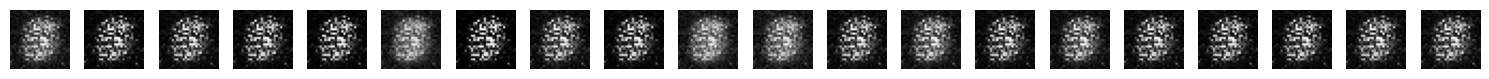

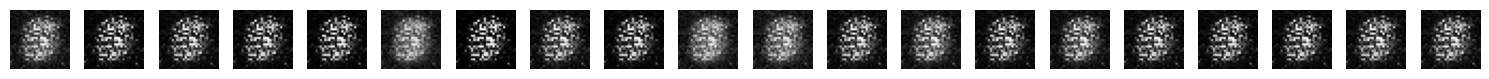

  3%|▎         | 11/400 [01:28<51:52,  8.00s/it]

Epoch [11/400], D Loss: 0.9820, G Loss: 1.9842


  3%|▎         | 12/400 [01:36<51:54,  8.03s/it]

Epoch [12/400], D Loss: 1.0765, G Loss: 1.4662


  3%|▎         | 13/400 [01:44<51:09,  7.93s/it]

Epoch [13/400], D Loss: 0.7267, G Loss: 2.9003


  4%|▎         | 14/400 [01:51<50:28,  7.85s/it]

Epoch [14/400], D Loss: 1.0731, G Loss: 2.0600


  4%|▍         | 15/400 [01:59<50:24,  7.86s/it]

Epoch [15/400], D Loss: 0.8947, G Loss: 2.2594


  4%|▍         | 16/400 [02:08<51:21,  8.03s/it]

Epoch [16/400], D Loss: 0.9223, G Loss: 2.6636


  4%|▍         | 17/400 [02:16<52:11,  8.18s/it]

Epoch [17/400], D Loss: 0.8939, G Loss: 2.0688


  4%|▍         | 18/400 [02:24<52:18,  8.22s/it]

Epoch [18/400], D Loss: 0.7523, G Loss: 4.0999


  5%|▍         | 19/400 [02:33<52:01,  8.19s/it]

Epoch [19/400], D Loss: 0.6867, G Loss: 4.1472
Epoch [20/400], D Loss: 1.0486, G Loss: 2.8377


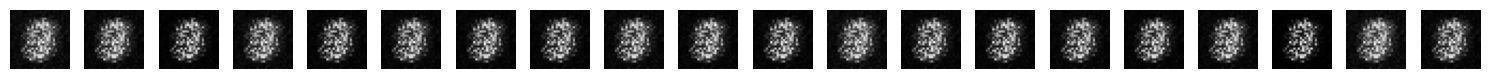

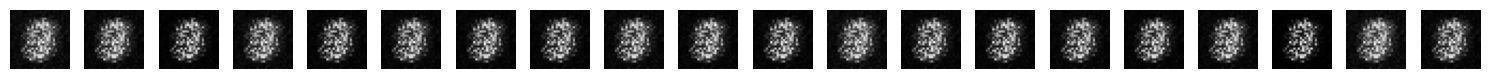

  5%|▌         | 21/400 [02:50<53:15,  8.43s/it]

Epoch [21/400], D Loss: 1.0409, G Loss: 2.1656


  6%|▌         | 22/400 [02:58<51:57,  8.25s/it]

Epoch [22/400], D Loss: 0.3389, G Loss: 2.8922


  6%|▌         | 23/400 [03:06<51:23,  8.18s/it]

Epoch [23/400], D Loss: 0.3894, G Loss: 2.9067


  6%|▌         | 24/400 [03:14<50:41,  8.09s/it]

Epoch [24/400], D Loss: 0.1762, G Loss: 3.5092


  6%|▋         | 25/400 [03:22<49:58,  8.00s/it]

Epoch [25/400], D Loss: 0.1528, G Loss: 3.8755


  6%|▋         | 26/400 [03:30<49:37,  7.96s/it]

Epoch [26/400], D Loss: 0.2580, G Loss: 3.8411


  7%|▋         | 27/400 [03:37<49:28,  7.96s/it]

Epoch [27/400], D Loss: 0.3627, G Loss: 3.8377


  7%|▋         | 28/400 [03:45<49:15,  7.94s/it]

Epoch [28/400], D Loss: 0.2933, G Loss: 5.3665


  7%|▋         | 29/400 [03:53<48:49,  7.90s/it]

Epoch [29/400], D Loss: 0.3844, G Loss: 5.3440
Epoch [30/400], D Loss: 0.3032, G Loss: 5.1218


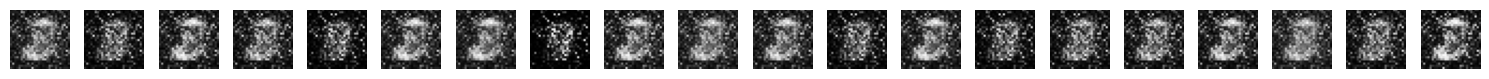

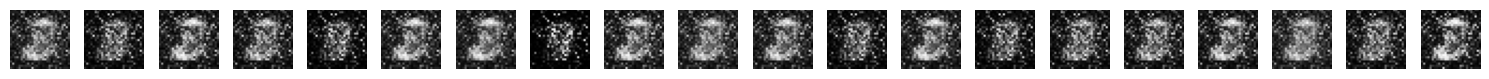

  8%|▊         | 31/400 [04:11<50:54,  8.28s/it]

Epoch [31/400], D Loss: 0.3099, G Loss: 5.2234


  8%|▊         | 32/400 [04:19<50:18,  8.20s/it]

Epoch [32/400], D Loss: 0.2490, G Loss: 4.6397


  8%|▊         | 33/400 [04:26<49:27,  8.09s/it]

Epoch [33/400], D Loss: 0.1968, G Loss: 4.3194


  8%|▊         | 34/400 [04:34<48:45,  7.99s/it]

Epoch [34/400], D Loss: 0.1405, G Loss: 4.6652


  9%|▉         | 35/400 [04:42<48:55,  8.04s/it]

Epoch [35/400], D Loss: 0.1016, G Loss: 5.3525


  9%|▉         | 36/400 [04:50<48:19,  7.97s/it]

Epoch [36/400], D Loss: 0.2163, G Loss: 5.5815


  9%|▉         | 37/400 [04:58<47:47,  7.90s/it]

Epoch [37/400], D Loss: 0.2585, G Loss: 5.0633


 10%|▉         | 38/400 [05:06<47:25,  7.86s/it]

Epoch [38/400], D Loss: 0.2439, G Loss: 6.1672


 10%|▉         | 39/400 [05:14<47:31,  7.90s/it]

Epoch [39/400], D Loss: 0.3934, G Loss: 6.3400
Epoch [40/400], D Loss: 0.2939, G Loss: 6.3880


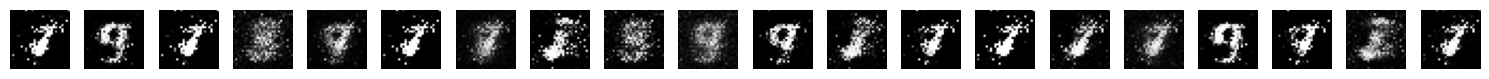

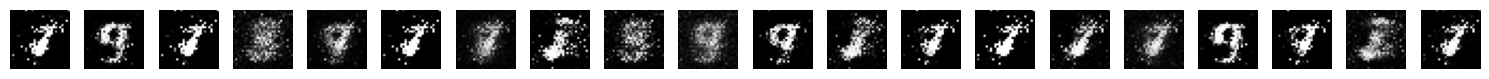

 10%|█         | 41/400 [05:30<47:55,  8.01s/it]

Epoch [41/400], D Loss: 0.1942, G Loss: 5.1448


 10%|█         | 42/400 [05:38<47:19,  7.93s/it]

Epoch [42/400], D Loss: 0.1640, G Loss: 5.1630


 11%|█         | 43/400 [05:46<47:27,  7.98s/it]

Epoch [43/400], D Loss: 0.2281, G Loss: 4.8560


 11%|█         | 44/400 [05:53<46:39,  7.86s/it]

Epoch [44/400], D Loss: 0.4325, G Loss: 5.9741


 11%|█▏        | 45/400 [06:01<45:59,  7.77s/it]

Epoch [45/400], D Loss: 0.3725, G Loss: 4.6341


 12%|█▏        | 46/400 [06:09<45:37,  7.73s/it]

Epoch [46/400], D Loss: 0.3066, G Loss: 4.9158


 12%|█▏        | 47/400 [06:16<45:36,  7.75s/it]

Epoch [47/400], D Loss: 0.2771, G Loss: 4.6551


 12%|█▏        | 48/400 [06:25<45:59,  7.84s/it]

Epoch [48/400], D Loss: 0.2476, G Loss: 3.9682


 12%|█▏        | 49/400 [06:32<45:54,  7.85s/it]

Epoch [49/400], D Loss: 0.1775, G Loss: 4.5071
Epoch [50/400], D Loss: 0.2141, G Loss: 4.7449


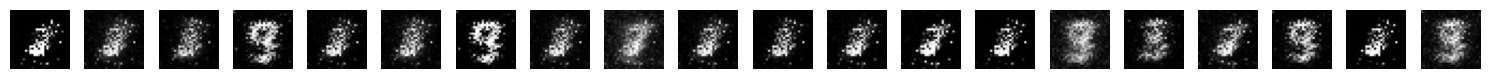

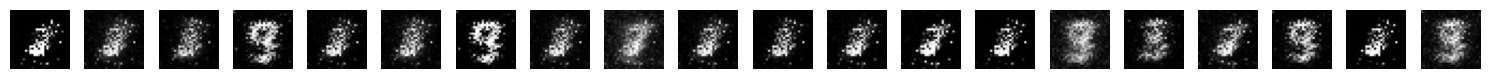

 13%|█▎        | 51/400 [06:51<49:07,  8.45s/it]

Epoch [51/400], D Loss: 0.4008, G Loss: 4.2611


 13%|█▎        | 52/400 [06:59<48:22,  8.34s/it]

Epoch [52/400], D Loss: 0.3033, G Loss: 4.6452


 13%|█▎        | 53/400 [07:07<48:22,  8.36s/it]

Epoch [53/400], D Loss: 0.3035, G Loss: 4.8953


 14%|█▎        | 54/400 [07:16<48:51,  8.47s/it]

Epoch [54/400], D Loss: 0.4126, G Loss: 4.7446


 14%|█▍        | 55/400 [07:25<49:22,  8.59s/it]

Epoch [55/400], D Loss: 0.2906, G Loss: 4.6202


 14%|█▍        | 56/400 [07:33<48:34,  8.47s/it]

Epoch [56/400], D Loss: 0.3186, G Loss: 4.5669


 14%|█▍        | 57/400 [07:41<48:13,  8.44s/it]

Epoch [57/400], D Loss: 0.3330, G Loss: 3.9508


 14%|█▍        | 58/400 [07:49<47:45,  8.38s/it]

Epoch [58/400], D Loss: 0.2360, G Loss: 4.3392


 15%|█▍        | 59/400 [07:58<47:54,  8.43s/it]

Epoch [59/400], D Loss: 0.2471, G Loss: 4.5883
Epoch [60/400], D Loss: 0.3409, G Loss: 5.2934


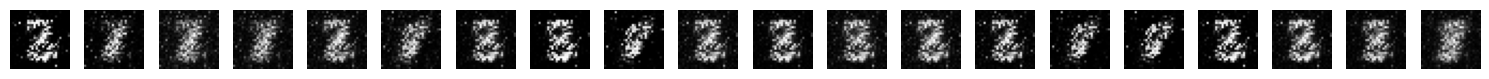

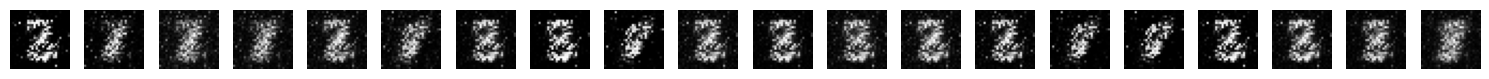

 15%|█▌        | 61/400 [08:17<50:05,  8.86s/it]

Epoch [61/400], D Loss: 0.3005, G Loss: 4.5676


 16%|█▌        | 62/400 [08:26<50:00,  8.88s/it]

Epoch [62/400], D Loss: 0.2847, G Loss: 4.4492


 16%|█▌        | 63/400 [08:34<49:39,  8.84s/it]

Epoch [63/400], D Loss: 0.2155, G Loss: 5.0397


 16%|█▌        | 64/400 [08:43<49:10,  8.78s/it]

Epoch [64/400], D Loss: 0.2560, G Loss: 4.6630


 16%|█▋        | 65/400 [08:52<48:43,  8.73s/it]

Epoch [65/400], D Loss: 0.2762, G Loss: 3.9786


 16%|█▋        | 66/400 [09:01<49:24,  8.88s/it]

Epoch [66/400], D Loss: 0.2709, G Loss: 4.7695


 17%|█▋        | 67/400 [09:10<49:02,  8.84s/it]

Epoch [67/400], D Loss: 0.3563, G Loss: 4.4606


 17%|█▋        | 68/400 [09:18<48:29,  8.76s/it]

Epoch [68/400], D Loss: 0.3871, G Loss: 4.3300


 17%|█▋        | 69/400 [09:27<47:57,  8.69s/it]

Epoch [69/400], D Loss: 0.2990, G Loss: 4.4510
Epoch [70/400], D Loss: 0.2043, G Loss: 4.3613


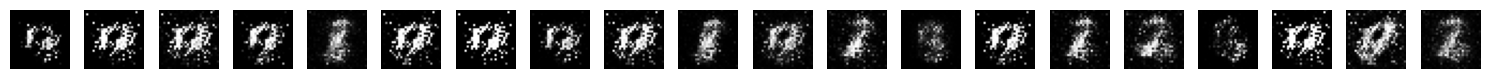

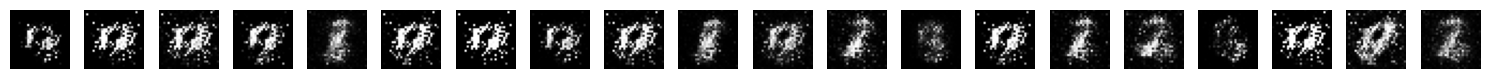

 18%|█▊        | 71/400 [09:45<48:52,  8.91s/it]

Epoch [71/400], D Loss: 0.2157, G Loss: 4.8235


 18%|█▊        | 72/400 [09:54<47:47,  8.74s/it]

Epoch [72/400], D Loss: 0.1889, G Loss: 4.9708


 18%|█▊        | 73/400 [10:02<47:14,  8.67s/it]

Epoch [73/400], D Loss: 0.2280, G Loss: 4.4040


 18%|█▊        | 74/400 [10:11<47:08,  8.68s/it]

Epoch [74/400], D Loss: 0.1645, G Loss: 4.7608


 19%|█▉        | 75/400 [10:19<46:38,  8.61s/it]

Epoch [75/400], D Loss: 0.1585, G Loss: 5.5104


 19%|█▉        | 76/400 [10:28<46:01,  8.52s/it]

Epoch [76/400], D Loss: 0.2259, G Loss: 4.5368


 19%|█▉        | 77/400 [10:36<45:48,  8.51s/it]

Epoch [77/400], D Loss: 0.2172, G Loss: 4.3058


 20%|█▉        | 78/400 [10:44<44:49,  8.35s/it]

Epoch [78/400], D Loss: 0.1724, G Loss: 4.8546


 20%|█▉        | 79/400 [10:52<44:11,  8.26s/it]

Epoch [79/400], D Loss: 0.2277, G Loss: 5.3331
Epoch [80/400], D Loss: 0.2122, G Loss: 5.3003


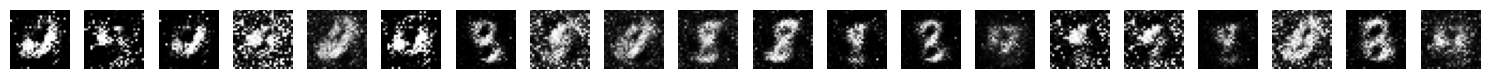

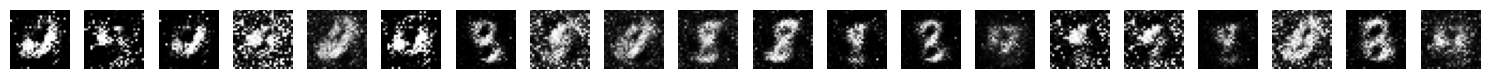

 20%|██        | 81/400 [11:10<45:25,  8.54s/it]

Epoch [81/400], D Loss: 0.2191, G Loss: 5.1164


 20%|██        | 82/400 [11:18<44:37,  8.42s/it]

Epoch [82/400], D Loss: 0.2265, G Loss: 4.2822


 21%|██        | 83/400 [11:26<44:03,  8.34s/it]

Epoch [83/400], D Loss: 0.1725, G Loss: 5.0994


 21%|██        | 84/400 [11:34<43:32,  8.27s/it]

Epoch [84/400], D Loss: 0.2451, G Loss: 5.0772


 21%|██▏       | 85/400 [11:43<43:39,  8.32s/it]

Epoch [85/400], D Loss: 0.2089, G Loss: 4.8918


 22%|██▏       | 86/400 [11:51<42:57,  8.21s/it]

Epoch [86/400], D Loss: 0.1881, G Loss: 5.2139


 22%|██▏       | 87/400 [11:59<42:23,  8.13s/it]

Epoch [87/400], D Loss: 0.1820, G Loss: 5.0246


 22%|██▏       | 88/400 [12:07<42:02,  8.08s/it]

Epoch [88/400], D Loss: 0.2381, G Loss: 5.0166


 22%|██▏       | 89/400 [12:15<42:18,  8.16s/it]

Epoch [89/400], D Loss: 0.2620, G Loss: 4.9209
Epoch [90/400], D Loss: 0.2715, G Loss: 4.3546


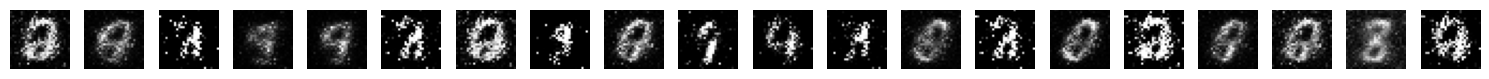

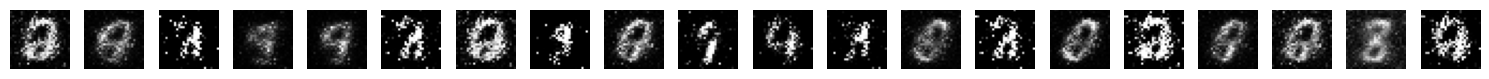

 23%|██▎       | 91/400 [12:31<42:10,  8.19s/it]

Epoch [91/400], D Loss: 0.2279, G Loss: 4.3583


 23%|██▎       | 92/400 [12:42<45:58,  8.96s/it]

Epoch [92/400], D Loss: 0.2441, G Loss: 5.0261


 23%|██▎       | 93/400 [12:54<49:39,  9.70s/it]

Epoch [93/400], D Loss: 0.2728, G Loss: 4.7982


 24%|██▎       | 94/400 [13:02<47:46,  9.37s/it]

Epoch [94/400], D Loss: 0.2181, G Loss: 4.3762


 24%|██▍       | 95/400 [13:11<46:37,  9.17s/it]

Epoch [95/400], D Loss: 0.2059, G Loss: 4.4655


 24%|██▍       | 96/400 [13:20<46:29,  9.18s/it]

Epoch [96/400], D Loss: 0.2243, G Loss: 5.0364


 24%|██▍       | 97/400 [13:29<45:37,  9.04s/it]

Epoch [97/400], D Loss: 0.2141, G Loss: 4.9946


 24%|██▍       | 98/400 [13:38<45:05,  8.96s/it]

Epoch [98/400], D Loss: 0.2342, G Loss: 4.6975


 25%|██▍       | 99/400 [13:46<44:32,  8.88s/it]

Epoch [99/400], D Loss: 0.2361, G Loss: 4.6108
Epoch [100/400], D Loss: 0.2807, G Loss: 4.3385


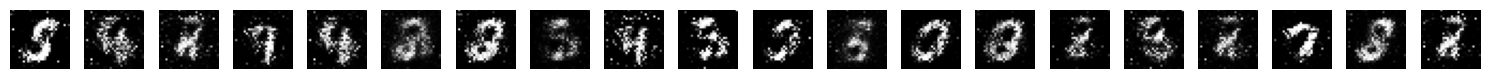

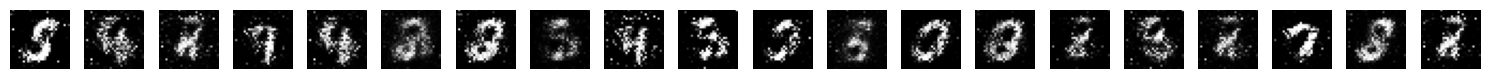

 25%|██▌       | 101/400 [14:05<45:19,  9.09s/it]

Epoch [101/400], D Loss: 0.2118, G Loss: 4.5545


 26%|██▌       | 102/400 [14:14<44:26,  8.95s/it]

Epoch [102/400], D Loss: 0.2429, G Loss: 4.7573


 26%|██▌       | 103/400 [14:23<44:31,  9.00s/it]

Epoch [103/400], D Loss: 0.2615, G Loss: 4.9461


 26%|██▌       | 104/400 [14:32<43:45,  8.87s/it]

Epoch [104/400], D Loss: 0.2162, G Loss: 4.6365


 26%|██▋       | 105/400 [14:40<43:14,  8.79s/it]

Epoch [105/400], D Loss: 0.1888, G Loss: 4.8517


 26%|██▋       | 106/400 [14:49<42:52,  8.75s/it]

Epoch [106/400], D Loss: 0.2200, G Loss: 4.6090


 27%|██▋       | 107/400 [14:58<43:15,  8.86s/it]

Epoch [107/400], D Loss: 0.2093, G Loss: 4.4727


 27%|██▋       | 108/400 [15:07<42:47,  8.79s/it]

Epoch [108/400], D Loss: 0.2024, G Loss: 4.7285


 27%|██▋       | 109/400 [15:15<42:31,  8.77s/it]

Epoch [109/400], D Loss: 0.2225, G Loss: 4.6462
Epoch [110/400], D Loss: 0.2481, G Loss: 4.4568


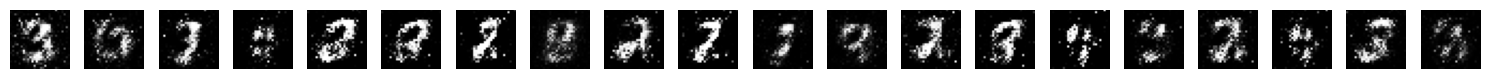

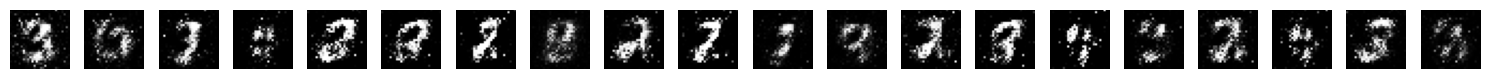

 28%|██▊       | 111/400 [15:34<42:59,  8.92s/it]

Epoch [111/400], D Loss: 0.2560, G Loss: 4.6267


 28%|██▊       | 112/400 [15:42<42:11,  8.79s/it]

Epoch [112/400], D Loss: 0.2395, G Loss: 4.5576


 28%|██▊       | 113/400 [15:51<41:34,  8.69s/it]

Epoch [113/400], D Loss: 0.2443, G Loss: 4.4550


 28%|██▊       | 114/400 [16:00<41:52,  8.78s/it]

Epoch [114/400], D Loss: 0.2603, G Loss: 4.2162


 29%|██▉       | 115/400 [16:08<41:15,  8.69s/it]

Epoch [115/400], D Loss: 0.2847, G Loss: 4.4294


 29%|██▉       | 116/400 [16:17<40:56,  8.65s/it]

Epoch [116/400], D Loss: 0.2719, G Loss: 4.6394


 29%|██▉       | 117/400 [16:25<40:31,  8.59s/it]

Epoch [117/400], D Loss: 0.2720, G Loss: 4.7066


 30%|██▉       | 118/400 [16:34<41:04,  8.74s/it]

Epoch [118/400], D Loss: 0.2991, G Loss: 5.0392


 30%|██▉       | 119/400 [16:43<40:36,  8.67s/it]

Epoch [119/400], D Loss: 0.2581, G Loss: 4.7598
Epoch [120/400], D Loss: 0.2929, G Loss: 4.9319


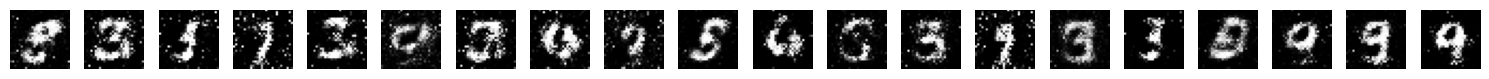

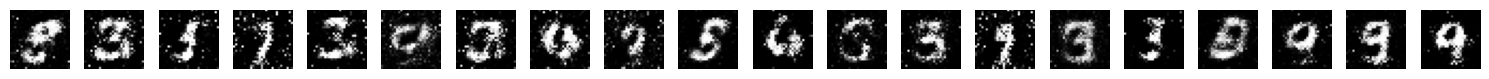

 30%|███       | 121/400 [17:01<41:32,  8.94s/it]

Epoch [121/400], D Loss: 0.2443, G Loss: 4.6905


 30%|███       | 122/400 [17:10<41:01,  8.85s/it]

Epoch [122/400], D Loss: 0.2237, G Loss: 4.7052


 31%|███       | 123/400 [17:18<40:31,  8.78s/it]

Epoch [123/400], D Loss: 0.2778, G Loss: 4.6685


 31%|███       | 124/400 [17:26<39:20,  8.55s/it]

Epoch [124/400], D Loss: 0.2810, G Loss: 4.4665


 31%|███▏      | 125/400 [17:35<38:56,  8.49s/it]

Epoch [125/400], D Loss: 0.2883, G Loss: 4.3509


 32%|███▏      | 126/400 [17:43<38:04,  8.34s/it]

Epoch [126/400], D Loss: 0.2663, G Loss: 4.5697


 32%|███▏      | 127/400 [17:51<37:22,  8.21s/it]

Epoch [127/400], D Loss: 0.2449, G Loss: 4.5347


 32%|███▏      | 128/400 [17:59<36:53,  8.14s/it]

Epoch [128/400], D Loss: 0.2828, G Loss: 4.7005


 32%|███▏      | 129/400 [18:07<37:01,  8.20s/it]

Epoch [129/400], D Loss: 0.2702, G Loss: 4.5055
Epoch [130/400], D Loss: 0.2682, G Loss: 4.3520


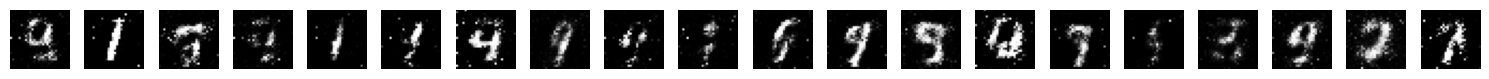

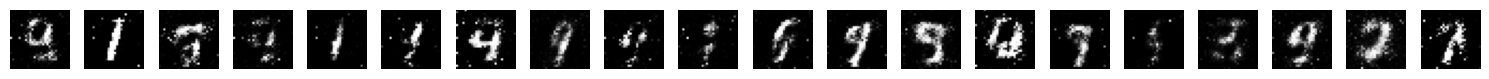

 33%|███▎      | 131/400 [18:24<36:47,  8.20s/it]

Epoch [131/400], D Loss: 0.2685, G Loss: 4.1989


 33%|███▎      | 132/400 [18:31<36:09,  8.09s/it]

Epoch [132/400], D Loss: 0.2783, G Loss: 4.4769


 33%|███▎      | 133/400 [18:40<36:16,  8.15s/it]

Epoch [133/400], D Loss: 0.2897, G Loss: 4.2531


 34%|███▎      | 134/400 [18:48<35:50,  8.08s/it]

Epoch [134/400], D Loss: 0.2966, G Loss: 4.6047


 34%|███▍      | 135/400 [18:56<35:21,  8.01s/it]

Epoch [135/400], D Loss: 0.2933, G Loss: 4.5907


 34%|███▍      | 136/400 [19:03<34:59,  7.95s/it]

Epoch [136/400], D Loss: 0.3109, G Loss: 4.2227


 34%|███▍      | 137/400 [19:12<35:23,  8.07s/it]

Epoch [137/400], D Loss: 0.3341, G Loss: 4.1613


 34%|███▍      | 138/400 [19:20<35:20,  8.09s/it]

Epoch [138/400], D Loss: 0.2925, G Loss: 4.0867


 35%|███▍      | 139/400 [19:28<34:50,  8.01s/it]

Epoch [139/400], D Loss: 0.2987, G Loss: 4.1336
Epoch [140/400], D Loss: 0.3201, G Loss: 4.2216


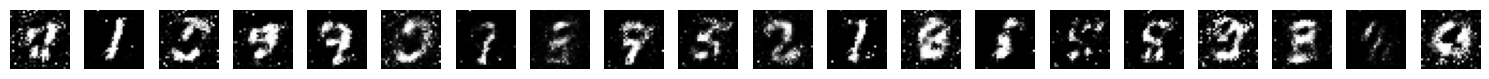

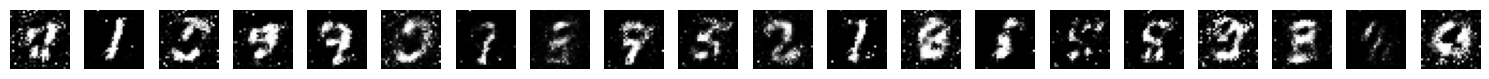

 35%|███▌      | 141/400 [19:44<35:10,  8.15s/it]

Epoch [141/400], D Loss: 0.3547, G Loss: 4.0358


 36%|███▌      | 142/400 [19:52<34:19,  7.98s/it]

Epoch [142/400], D Loss: 0.3986, G Loss: 3.8220


 36%|███▌      | 143/400 [20:00<33:45,  7.88s/it]

Epoch [143/400], D Loss: 0.3953, G Loss: 3.7429


 36%|███▌      | 144/400 [20:07<33:33,  7.87s/it]

Epoch [144/400], D Loss: 0.3507, G Loss: 3.9025


 36%|███▋      | 145/400 [20:16<34:17,  8.07s/it]

Epoch [145/400], D Loss: 0.3778, G Loss: 3.8984


 36%|███▋      | 146/400 [20:24<33:44,  7.97s/it]

Epoch [146/400], D Loss: 0.3813, G Loss: 3.7270


 37%|███▋      | 147/400 [20:31<33:20,  7.91s/it]

Epoch [147/400], D Loss: 0.3738, G Loss: 3.8946


 37%|███▋      | 148/400 [20:39<33:03,  7.87s/it]

Epoch [148/400], D Loss: 0.3402, G Loss: 4.0213


 37%|███▋      | 149/400 [20:48<33:41,  8.05s/it]

Epoch [149/400], D Loss: 0.3635, G Loss: 4.0255
Epoch [150/400], D Loss: 0.3890, G Loss: 3.6380


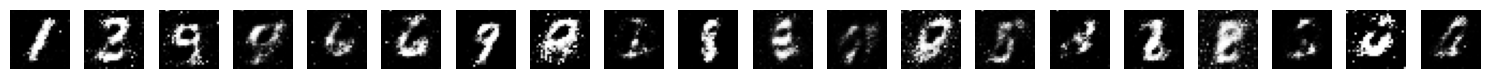

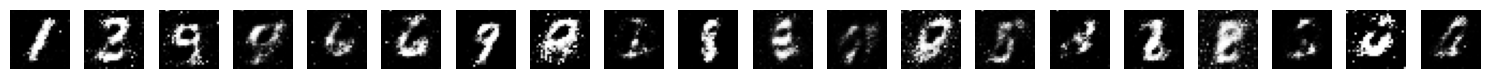

 38%|███▊      | 151/400 [21:08<37:52,  9.13s/it]

Epoch [151/400], D Loss: 0.3994, G Loss: 3.5470


 38%|███▊      | 152/400 [21:16<36:34,  8.85s/it]

Epoch [152/400], D Loss: 0.4156, G Loss: 3.5656


 38%|███▊      | 153/400 [21:24<36:07,  8.78s/it]

Epoch [153/400], D Loss: 0.4289, G Loss: 3.3872


 38%|███▊      | 154/400 [21:32<34:51,  8.50s/it]

Epoch [154/400], D Loss: 0.4198, G Loss: 3.4881


 39%|███▉      | 155/400 [21:40<34:04,  8.35s/it]

Epoch [155/400], D Loss: 0.4236, G Loss: 3.3683


 39%|███▉      | 156/400 [21:48<33:34,  8.26s/it]

Epoch [156/400], D Loss: 0.4150, G Loss: 3.4130


 39%|███▉      | 157/400 [21:57<33:56,  8.38s/it]

Epoch [157/400], D Loss: 0.4594, G Loss: 3.2611


 40%|███▉      | 158/400 [22:05<33:33,  8.32s/it]

Epoch [158/400], D Loss: 0.4734, G Loss: 3.2733


 40%|███▉      | 159/400 [22:13<33:20,  8.30s/it]

Epoch [159/400], D Loss: 0.4690, G Loss: 3.2809
Epoch [160/400], D Loss: 0.4998, G Loss: 3.1102


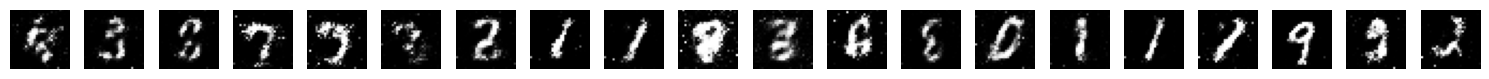

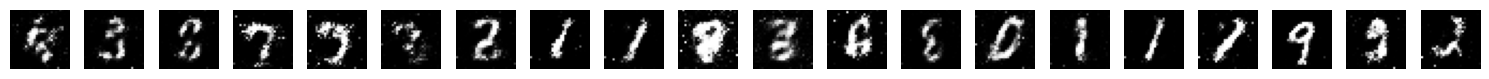

 40%|████      | 161/400 [22:31<33:31,  8.42s/it]

Epoch [161/400], D Loss: 0.4961, G Loss: 3.1314


 40%|████      | 162/400 [22:39<32:51,  8.28s/it]

Epoch [162/400], D Loss: 0.4828, G Loss: 3.0520


 41%|████      | 163/400 [22:47<32:25,  8.21s/it]

Epoch [163/400], D Loss: 0.4697, G Loss: 3.1715


 41%|████      | 164/400 [22:55<32:14,  8.20s/it]

Epoch [164/400], D Loss: 0.4931, G Loss: 3.1262


 41%|████▏     | 165/400 [23:03<32:02,  8.18s/it]

Epoch [165/400], D Loss: 0.4539, G Loss: 3.3297


 42%|████▏     | 166/400 [23:11<31:57,  8.20s/it]

Epoch [166/400], D Loss: 0.5039, G Loss: 3.1169


 42%|████▏     | 167/400 [23:19<31:43,  8.17s/it]

Epoch [167/400], D Loss: 0.4791, G Loss: 3.0062


 42%|████▏     | 168/400 [23:28<31:47,  8.22s/it]

Epoch [168/400], D Loss: 0.4937, G Loss: 3.0541


 42%|████▏     | 169/400 [23:36<31:23,  8.15s/it]

Epoch [169/400], D Loss: 0.4775, G Loss: 3.0827
Epoch [170/400], D Loss: 0.4519, G Loss: 3.1043


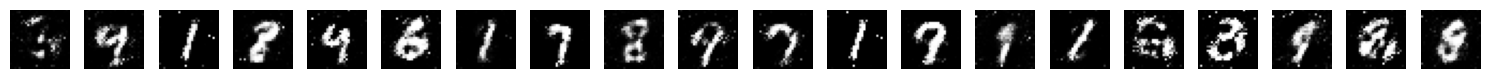

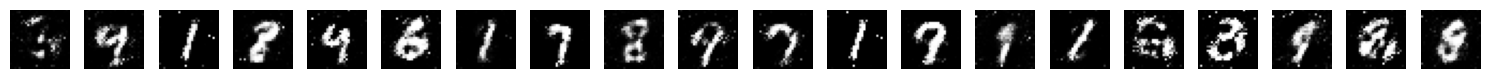

 43%|████▎     | 171/400 [23:53<31:37,  8.29s/it]

Epoch [171/400], D Loss: 0.4575, G Loss: 3.1768


 43%|████▎     | 172/400 [24:01<31:47,  8.37s/it]

Epoch [172/400], D Loss: 0.4739, G Loss: 3.0714


 43%|████▎     | 173/400 [24:09<31:23,  8.30s/it]

Epoch [173/400], D Loss: 0.4859, G Loss: 3.0348


 44%|████▎     | 174/400 [24:17<31:00,  8.23s/it]

Epoch [174/400], D Loss: 0.4796, G Loss: 3.0455


 44%|████▍     | 175/400 [24:26<30:40,  8.18s/it]

Epoch [175/400], D Loss: 0.5525, G Loss: 2.8919


 44%|████▍     | 176/400 [24:34<30:59,  8.30s/it]

Epoch [176/400], D Loss: 0.5144, G Loss: 2.7836


 44%|████▍     | 177/400 [24:42<30:32,  8.22s/it]

Epoch [177/400], D Loss: 0.5390, G Loss: 2.9450


 44%|████▍     | 178/400 [24:50<30:08,  8.14s/it]

Epoch [178/400], D Loss: 0.5169, G Loss: 2.8802


 45%|████▍     | 179/400 [24:58<29:54,  8.12s/it]

Epoch [179/400], D Loss: 0.5646, G Loss: 2.8790
Epoch [180/400], D Loss: 0.6028, G Loss: 2.7033


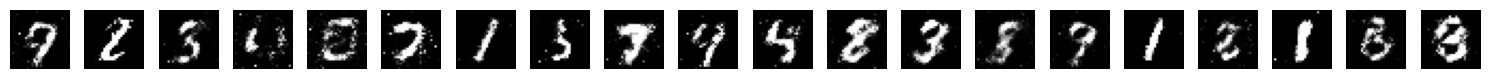

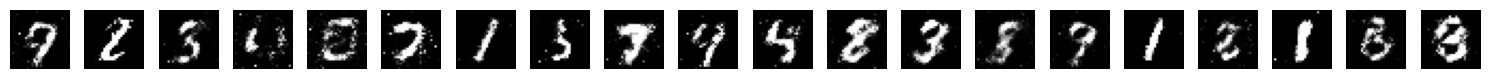

 45%|████▌     | 181/400 [25:16<31:10,  8.54s/it]

Epoch [181/400], D Loss: 0.5521, G Loss: 2.7233


 46%|████▌     | 182/400 [25:25<30:42,  8.45s/it]

Epoch [182/400], D Loss: 0.5925, G Loss: 2.7523


 46%|████▌     | 183/400 [25:33<30:12,  8.35s/it]

Epoch [183/400], D Loss: 0.5771, G Loss: 2.6788


 46%|████▌     | 184/400 [25:41<30:24,  8.45s/it]

Epoch [184/400], D Loss: 0.6066, G Loss: 2.7309


 46%|████▋     | 185/400 [25:50<30:04,  8.39s/it]

Epoch [185/400], D Loss: 0.5685, G Loss: 2.6524


 46%|████▋     | 186/400 [25:58<29:53,  8.38s/it]

Epoch [186/400], D Loss: 0.5685, G Loss: 2.7397


 47%|████▋     | 187/400 [26:06<29:38,  8.35s/it]

Epoch [187/400], D Loss: 0.5775, G Loss: 2.5927


 47%|████▋     | 188/400 [26:15<29:40,  8.40s/it]

Epoch [188/400], D Loss: 0.5821, G Loss: 2.6743


 47%|████▋     | 189/400 [26:23<29:12,  8.31s/it]

Epoch [189/400], D Loss: 0.5765, G Loss: 2.6968
Epoch [190/400], D Loss: 0.5675, G Loss: 2.7592


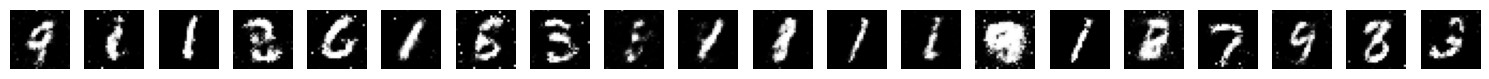

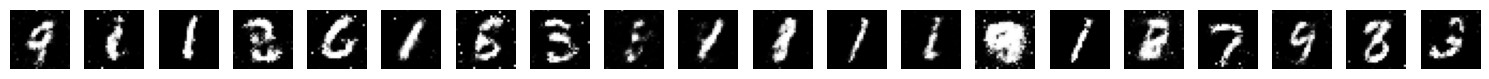

 48%|████▊     | 191/400 [26:40<29:38,  8.51s/it]

Epoch [191/400], D Loss: 0.6030, G Loss: 2.5183


 48%|████▊     | 192/400 [26:49<29:10,  8.42s/it]

Epoch [192/400], D Loss: 0.5700, G Loss: 2.5848


 48%|████▊     | 193/400 [26:57<28:47,  8.34s/it]

Epoch [193/400], D Loss: 0.6212, G Loss: 2.4295


 48%|████▊     | 194/400 [27:05<28:28,  8.29s/it]

Epoch [194/400], D Loss: 0.5830, G Loss: 2.6591


 49%|████▉     | 195/400 [27:14<28:39,  8.39s/it]

Epoch [195/400], D Loss: 0.5779, G Loss: 2.5732


 49%|████▉     | 196/400 [27:22<28:15,  8.31s/it]

Epoch [196/400], D Loss: 0.6219, G Loss: 2.5446


 49%|████▉     | 197/400 [27:30<27:52,  8.24s/it]

Epoch [197/400], D Loss: 0.5737, G Loss: 2.6186


 50%|████▉     | 198/400 [27:38<27:36,  8.20s/it]

Epoch [198/400], D Loss: 0.5930, G Loss: 2.6746


 50%|████▉     | 199/400 [27:46<27:51,  8.32s/it]

Epoch [199/400], D Loss: 0.6238, G Loss: 2.6467
Epoch [200/400], D Loss: 0.6202, G Loss: 2.5042


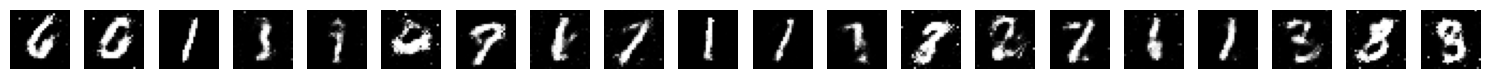

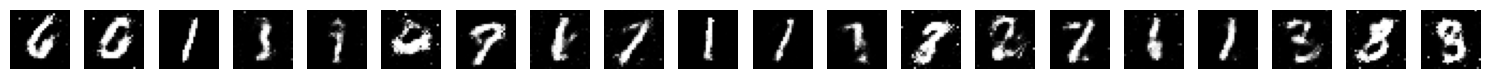

 50%|█████     | 201/400 [28:03<27:36,  8.32s/it]

Epoch [201/400], D Loss: 0.6061, G Loss: 2.4935


 50%|█████     | 202/400 [28:11<26:58,  8.17s/it]

Epoch [202/400], D Loss: 0.5927, G Loss: 2.5253


 51%|█████     | 203/400 [28:20<27:06,  8.26s/it]

Epoch [203/400], D Loss: 0.6122, G Loss: 2.4839


 51%|█████     | 204/400 [28:28<26:38,  8.16s/it]

Epoch [204/400], D Loss: 0.6217, G Loss: 2.4720


 51%|█████▏    | 205/400 [28:35<26:07,  8.04s/it]

Epoch [205/400], D Loss: 0.6238, G Loss: 2.5335


 52%|█████▏    | 206/400 [28:43<25:48,  7.98s/it]

Epoch [206/400], D Loss: 0.6313, G Loss: 2.5683


 52%|█████▏    | 207/400 [28:51<25:58,  8.07s/it]

Epoch [207/400], D Loss: 0.6625, G Loss: 2.4144


 52%|█████▏    | 208/400 [28:59<25:36,  8.00s/it]

Epoch [208/400], D Loss: 0.6289, G Loss: 2.4050


 52%|█████▏    | 209/400 [29:07<25:23,  7.98s/it]

Epoch [209/400], D Loss: 0.6587, G Loss: 2.3707
Epoch [210/400], D Loss: 0.6649, G Loss: 2.3208


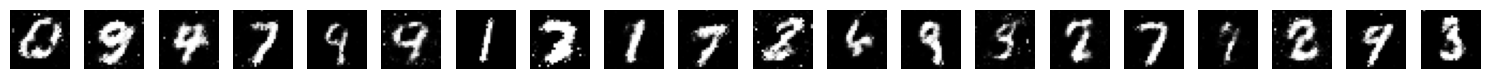

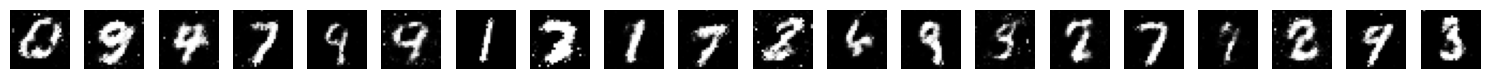

 53%|█████▎    | 211/400 [29:27<28:58,  9.20s/it]

Epoch [211/400], D Loss: 0.6427, G Loss: 2.3711


 53%|█████▎    | 212/400 [29:36<27:56,  8.92s/it]

Epoch [212/400], D Loss: 0.6347, G Loss: 2.4113


 53%|█████▎    | 213/400 [29:44<27:09,  8.71s/it]

Epoch [213/400], D Loss: 0.6589, G Loss: 2.3000


 54%|█████▎    | 214/400 [29:52<26:36,  8.58s/it]

Epoch [214/400], D Loss: 0.6672, G Loss: 2.3269


 54%|█████▍    | 215/400 [30:01<26:23,  8.56s/it]

Epoch [215/400], D Loss: 0.6400, G Loss: 2.3697


 54%|█████▍    | 216/400 [30:09<25:57,  8.46s/it]

Epoch [216/400], D Loss: 0.6592, G Loss: 2.3748


 54%|█████▍    | 217/400 [30:17<25:32,  8.37s/it]

Epoch [217/400], D Loss: 0.6607, G Loss: 2.3921


 55%|█████▍    | 218/400 [30:25<25:15,  8.33s/it]

Epoch [218/400], D Loss: 0.6745, G Loss: 2.3209


 55%|█████▍    | 219/400 [30:33<24:50,  8.23s/it]

Epoch [219/400], D Loss: 0.6630, G Loss: 2.4022
Epoch [220/400], D Loss: 0.6761, G Loss: 2.3168


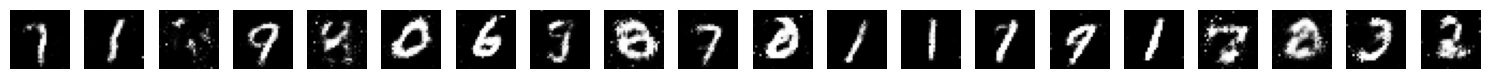

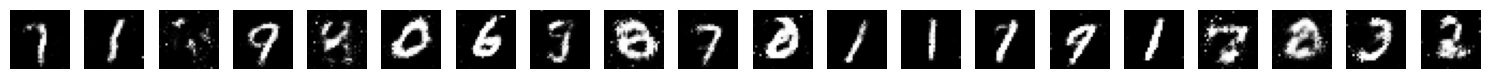

 55%|█████▌    | 221/400 [30:50<24:46,  8.31s/it]

Epoch [221/400], D Loss: 0.6863, G Loss: 2.3116


 56%|█████▌    | 222/400 [30:59<24:47,  8.36s/it]

Epoch [222/400], D Loss: 0.6816, G Loss: 2.2906


 56%|█████▌    | 223/400 [31:07<24:22,  8.26s/it]

Epoch [223/400], D Loss: 0.6668, G Loss: 2.3151


 56%|█████▌    | 224/400 [31:15<24:03,  8.20s/it]

Epoch [224/400], D Loss: 0.6931, G Loss: 2.3134


 56%|█████▋    | 225/400 [31:23<23:40,  8.12s/it]

Epoch [225/400], D Loss: 0.6918, G Loss: 2.2719


 56%|█████▋    | 226/400 [31:31<23:38,  8.15s/it]

Epoch [226/400], D Loss: 0.7135, G Loss: 2.2166


 57%|█████▋    | 227/400 [31:39<23:14,  8.06s/it]

Epoch [227/400], D Loss: 0.6915, G Loss: 2.2540


 57%|█████▋    | 228/400 [31:47<22:57,  8.01s/it]

Epoch [228/400], D Loss: 0.6909, G Loss: 2.2197


 57%|█████▋    | 229/400 [31:55<22:47,  8.00s/it]

Epoch [229/400], D Loss: 0.7264, G Loss: 2.2212
Epoch [230/400], D Loss: 0.6941, G Loss: 2.1932


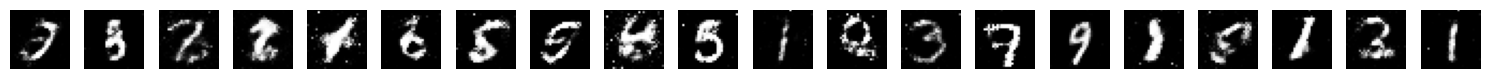

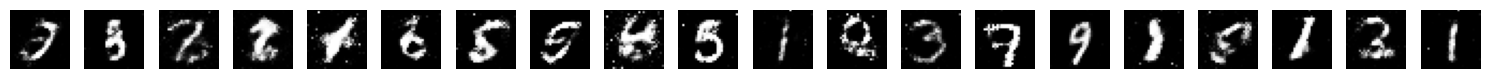

 58%|█████▊    | 231/400 [32:12<23:06,  8.21s/it]

Epoch [231/400], D Loss: 0.7005, G Loss: 2.2263


 58%|█████▊    | 232/400 [32:20<22:36,  8.08s/it]

Epoch [232/400], D Loss: 0.7218, G Loss: 2.1162


 58%|█████▊    | 233/400 [32:27<22:12,  7.98s/it]

Epoch [233/400], D Loss: 0.6818, G Loss: 2.2985


 58%|█████▊    | 234/400 [32:36<22:15,  8.04s/it]

Epoch [234/400], D Loss: 0.7106, G Loss: 2.2157


 59%|█████▉    | 235/400 [32:43<21:57,  7.99s/it]

Epoch [235/400], D Loss: 0.7055, G Loss: 2.1618


 59%|█████▉    | 236/400 [32:51<21:41,  7.93s/it]

Epoch [236/400], D Loss: 0.6885, G Loss: 2.2453


 59%|█████▉    | 237/400 [32:59<21:25,  7.89s/it]

Epoch [237/400], D Loss: 0.6832, G Loss: 2.2250


 60%|█████▉    | 238/400 [33:07<21:34,  7.99s/it]

Epoch [238/400], D Loss: 0.7031, G Loss: 2.2956


 60%|█████▉    | 239/400 [33:15<21:16,  7.93s/it]

Epoch [239/400], D Loss: 0.6926, G Loss: 2.2603
Epoch [240/400], D Loss: 0.7161, G Loss: 2.2014


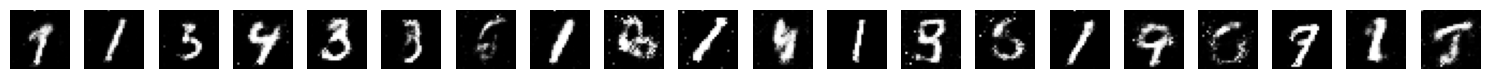

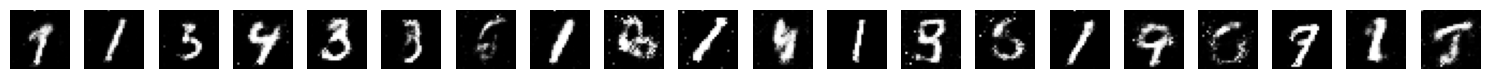

 60%|██████    | 241/400 [33:32<21:35,  8.15s/it]

Epoch [241/400], D Loss: 0.7225, G Loss: 2.1719


 60%|██████    | 242/400 [33:40<21:40,  8.23s/it]

Epoch [242/400], D Loss: 0.7100, G Loss: 2.1730


 61%|██████    | 243/400 [33:48<21:10,  8.09s/it]

Epoch [243/400], D Loss: 0.7102, G Loss: 2.1860


 61%|██████    | 244/400 [33:56<20:54,  8.04s/it]

Epoch [244/400], D Loss: 0.7417, G Loss: 2.1063


 61%|██████▏   | 245/400 [34:04<20:39,  8.00s/it]

Epoch [245/400], D Loss: 0.7127, G Loss: 2.1768


 62%|██████▏   | 246/400 [34:12<20:50,  8.12s/it]

Epoch [246/400], D Loss: 0.7166, G Loss: 2.2166


 62%|██████▏   | 247/400 [34:20<20:32,  8.06s/it]

Epoch [247/400], D Loss: 0.6957, G Loss: 2.1916


 62%|██████▏   | 248/400 [34:28<20:15,  8.00s/it]

Epoch [248/400], D Loss: 0.7129, G Loss: 2.2226


 62%|██████▏   | 249/400 [34:36<20:01,  7.96s/it]

Epoch [249/400], D Loss: 0.7157, G Loss: 2.2352
Epoch [250/400], D Loss: 0.7040, G Loss: 2.1906


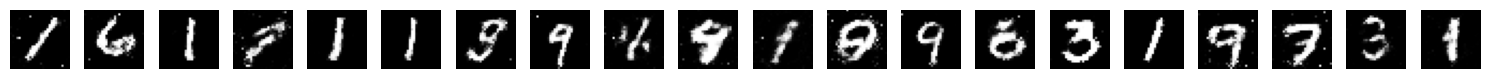

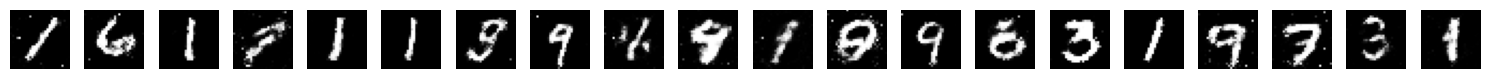

 63%|██████▎   | 251/400 [34:53<20:29,  8.25s/it]

Epoch [251/400], D Loss: 0.7140, G Loss: 2.1336


 63%|██████▎   | 252/400 [35:01<20:05,  8.14s/it]

Epoch [252/400], D Loss: 0.7244, G Loss: 2.0909


 63%|██████▎   | 253/400 [35:09<19:40,  8.03s/it]

Epoch [253/400], D Loss: 0.7254, G Loss: 2.0815


 64%|██████▎   | 254/400 [35:17<19:41,  8.10s/it]

Epoch [254/400], D Loss: 0.7093, G Loss: 2.1826


 64%|██████▍   | 255/400 [35:25<19:21,  8.01s/it]

Epoch [255/400], D Loss: 0.7312, G Loss: 2.1300


 64%|██████▍   | 256/400 [35:33<19:02,  7.93s/it]

Epoch [256/400], D Loss: 0.7064, G Loss: 2.1776


 64%|██████▍   | 257/400 [35:41<18:54,  7.93s/it]

Epoch [257/400], D Loss: 0.7376, G Loss: 2.2126


 64%|██████▍   | 258/400 [35:49<19:06,  8.07s/it]

Epoch [258/400], D Loss: 0.7376, G Loss: 2.1712


 65%|██████▍   | 259/400 [35:57<18:51,  8.03s/it]

Epoch [259/400], D Loss: 0.7353, G Loss: 2.0727
Epoch [260/400], D Loss: 0.7518, G Loss: 2.0829


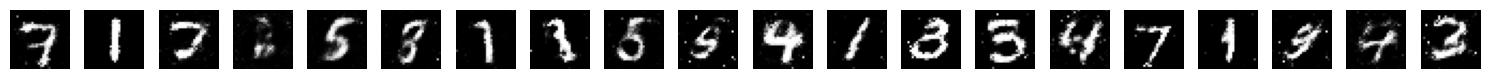

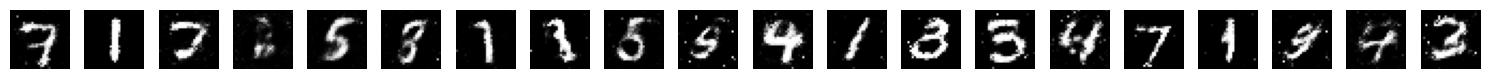

 65%|██████▌   | 261/400 [36:14<18:49,  8.13s/it]

Epoch [261/400], D Loss: 0.7661, G Loss: 1.9721


 66%|██████▌   | 262/400 [36:22<18:56,  8.24s/it]

Epoch [262/400], D Loss: 0.7469, G Loss: 2.0264


 66%|██████▌   | 263/400 [36:30<18:34,  8.14s/it]

Epoch [263/400], D Loss: 0.7592, G Loss: 2.0071


 66%|██████▌   | 264/400 [36:38<18:25,  8.13s/it]

Epoch [264/400], D Loss: 0.7443, G Loss: 2.0311


 66%|██████▋   | 265/400 [36:46<18:18,  8.14s/it]

Epoch [265/400], D Loss: 0.7427, G Loss: 2.1368


 66%|██████▋   | 266/400 [36:55<18:23,  8.24s/it]

Epoch [266/400], D Loss: 0.7258, G Loss: 2.1720


 67%|██████▋   | 267/400 [37:03<18:01,  8.13s/it]

Epoch [267/400], D Loss: 0.7543, G Loss: 2.1203


 67%|██████▋   | 268/400 [37:11<17:43,  8.06s/it]

Epoch [268/400], D Loss: 0.7476, G Loss: 2.1068


 67%|██████▋   | 269/400 [37:18<17:28,  8.00s/it]

Epoch [269/400], D Loss: 0.7414, G Loss: 2.0302
Epoch [270/400], D Loss: 0.7490, G Loss: 2.0046


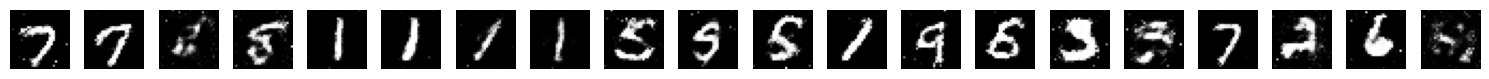

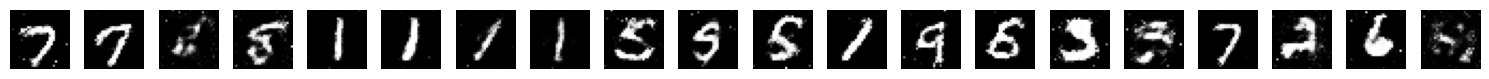

 68%|██████▊   | 271/400 [37:36<18:00,  8.37s/it]

Epoch [271/400], D Loss: 0.7342, G Loss: 2.1230


 68%|██████▊   | 272/400 [37:44<17:38,  8.27s/it]

Epoch [272/400], D Loss: 0.7745, G Loss: 1.9905


 68%|██████▊   | 273/400 [37:52<17:16,  8.16s/it]

Epoch [273/400], D Loss: 0.7322, G Loss: 2.1452


 68%|██████▊   | 274/400 [38:01<17:27,  8.32s/it]

Epoch [274/400], D Loss: 0.7755, G Loss: 1.9785


 69%|██████▉   | 275/400 [38:09<17:12,  8.26s/it]

Epoch [275/400], D Loss: 0.7614, G Loss: 2.0203


 69%|██████▉   | 276/400 [38:17<17:00,  8.23s/it]

Epoch [276/400], D Loss: 0.7579, G Loss: 1.9916


 69%|██████▉   | 277/400 [38:25<16:51,  8.22s/it]

Epoch [277/400], D Loss: 0.7267, G Loss: 2.0740


 70%|██████▉   | 278/400 [38:34<16:59,  8.36s/it]

Epoch [278/400], D Loss: 0.7712, G Loss: 1.9940


 70%|██████▉   | 279/400 [38:42<16:43,  8.29s/it]

Epoch [279/400], D Loss: 0.7481, G Loss: 2.0356
Epoch [280/400], D Loss: 0.7539, G Loss: 2.0428


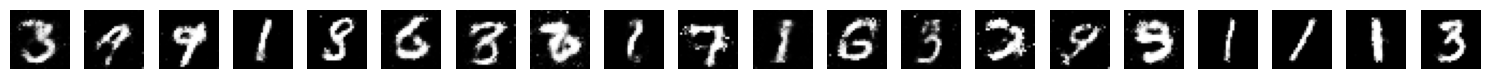

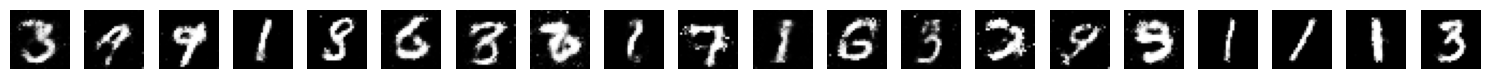

 70%|███████   | 281/400 [39:00<16:48,  8.48s/it]

Epoch [281/400], D Loss: 0.7481, G Loss: 2.0716


 70%|███████   | 282/400 [39:08<16:34,  8.43s/it]

Epoch [282/400], D Loss: 0.7511, G Loss: 2.0373


 71%|███████   | 283/400 [39:16<16:13,  8.32s/it]

Epoch [283/400], D Loss: 0.7227, G Loss: 2.1379


 71%|███████   | 284/400 [39:24<15:56,  8.25s/it]

Epoch [284/400], D Loss: 0.7381, G Loss: 2.0833


 71%|███████▏  | 285/400 [39:32<15:51,  8.27s/it]

Epoch [285/400], D Loss: 0.7426, G Loss: 2.0723


 72%|███████▏  | 286/400 [39:41<15:36,  8.21s/it]

Epoch [286/400], D Loss: 0.7525, G Loss: 1.9710


 72%|███████▏  | 287/400 [39:49<15:22,  8.16s/it]

Epoch [287/400], D Loss: 0.7508, G Loss: 2.0677


 72%|███████▏  | 288/400 [39:57<15:09,  8.12s/it]

Epoch [288/400], D Loss: 0.7588, G Loss: 2.0042


 72%|███████▏  | 289/400 [40:05<15:13,  8.23s/it]

Epoch [289/400], D Loss: 0.7671, G Loss: 2.0340
Epoch [290/400], D Loss: 0.7615, G Loss: 2.0121


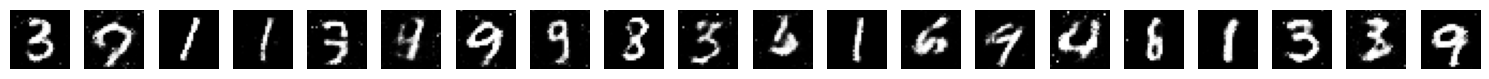

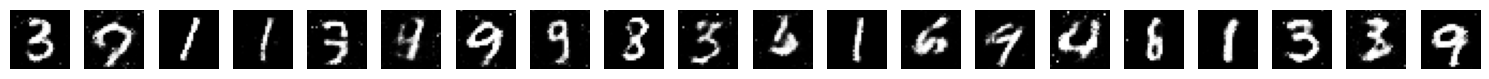

 73%|███████▎  | 291/400 [40:22<15:06,  8.32s/it]

Epoch [291/400], D Loss: 0.7501, G Loss: 1.9927


 73%|███████▎  | 292/400 [40:30<14:48,  8.23s/it]

Epoch [292/400], D Loss: 0.7589, G Loss: 1.9772


 73%|███████▎  | 293/400 [40:39<14:51,  8.33s/it]

Epoch [293/400], D Loss: 0.7602, G Loss: 2.0328


 74%|███████▎  | 294/400 [40:47<14:35,  8.26s/it]

Epoch [294/400], D Loss: 0.7617, G Loss: 2.0050


 74%|███████▍  | 295/400 [40:55<14:22,  8.22s/it]

Epoch [295/400], D Loss: 0.7516, G Loss: 2.0354


 74%|███████▍  | 296/400 [41:03<14:08,  8.16s/it]

Epoch [296/400], D Loss: 0.7620, G Loss: 2.0516


 74%|███████▍  | 297/400 [41:11<14:14,  8.29s/it]

Epoch [297/400], D Loss: 0.7583, G Loss: 1.9852


 74%|███████▍  | 298/400 [41:20<13:58,  8.22s/it]

Epoch [298/400], D Loss: 0.7536, G Loss: 2.0515


 75%|███████▍  | 299/400 [41:28<13:47,  8.19s/it]

Epoch [299/400], D Loss: 0.7800, G Loss: 1.9725
Epoch [300/400], D Loss: 0.7565, G Loss: 1.9736


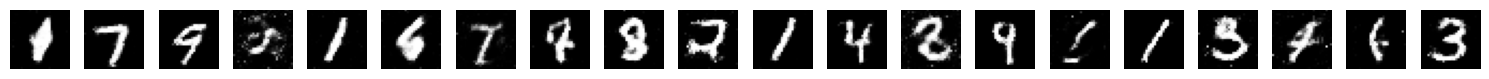

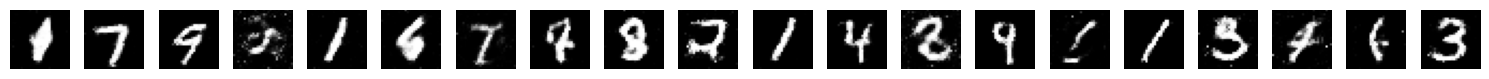

 75%|███████▌  | 301/400 [41:46<14:08,  8.57s/it]

Epoch [301/400], D Loss: 0.7524, G Loss: 2.0263


 76%|███████▌  | 302/400 [41:54<13:44,  8.41s/it]

Epoch [302/400], D Loss: 0.7469, G Loss: 2.0712


 76%|███████▌  | 303/400 [42:02<13:25,  8.31s/it]

Epoch [303/400], D Loss: 0.7574, G Loss: 2.0601


 76%|███████▌  | 304/400 [42:10<13:11,  8.25s/it]

Epoch [304/400], D Loss: 0.7678, G Loss: 1.9873


 76%|███████▋  | 305/400 [42:19<13:16,  8.38s/it]

Epoch [305/400], D Loss: 0.7718, G Loss: 2.0263


 76%|███████▋  | 306/400 [42:27<13:01,  8.32s/it]

Epoch [306/400], D Loss: 0.7869, G Loss: 1.9437


 77%|███████▋  | 307/400 [42:35<12:47,  8.26s/it]

Epoch [307/400], D Loss: 0.7790, G Loss: 1.9974


 77%|███████▋  | 308/400 [42:43<12:34,  8.20s/it]

Epoch [308/400], D Loss: 0.7827, G Loss: 1.9817


 77%|███████▋  | 309/400 [42:52<12:38,  8.33s/it]

Epoch [309/400], D Loss: 0.7537, G Loss: 1.9724
Epoch [310/400], D Loss: 0.7785, G Loss: 1.9450


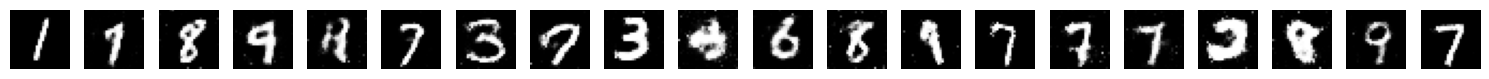

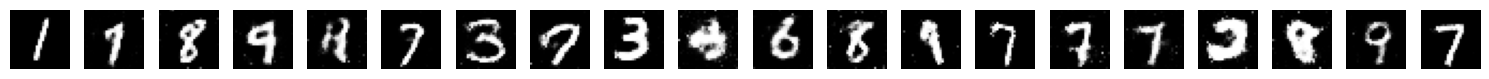

 78%|███████▊  | 311/400 [43:09<12:30,  8.43s/it]

Epoch [311/400], D Loss: 0.7790, G Loss: 1.9298


 78%|███████▊  | 312/400 [43:17<12:18,  8.39s/it]

Epoch [312/400], D Loss: 0.7786, G Loss: 1.9381


 78%|███████▊  | 313/400 [43:25<12:03,  8.32s/it]

Epoch [313/400], D Loss: 0.7744, G Loss: 1.9638


 78%|███████▊  | 314/400 [43:33<11:47,  8.23s/it]

Epoch [314/400], D Loss: 0.7713, G Loss: 2.0037


 79%|███████▉  | 315/400 [43:41<11:33,  8.16s/it]

Epoch [315/400], D Loss: 0.7690, G Loss: 2.0099


 79%|███████▉  | 316/400 [43:50<11:31,  8.23s/it]

Epoch [316/400], D Loss: 0.7803, G Loss: 1.9453


 79%|███████▉  | 317/400 [43:58<11:19,  8.19s/it]

Epoch [317/400], D Loss: 0.7800, G Loss: 1.9617


 80%|███████▉  | 318/400 [44:06<11:06,  8.13s/it]

Epoch [318/400], D Loss: 0.7915, G Loss: 1.9383


 80%|███████▉  | 319/400 [44:14<10:57,  8.12s/it]

Epoch [319/400], D Loss: 0.7831, G Loss: 1.9670
Epoch [320/400], D Loss: 0.7944, G Loss: 1.9000


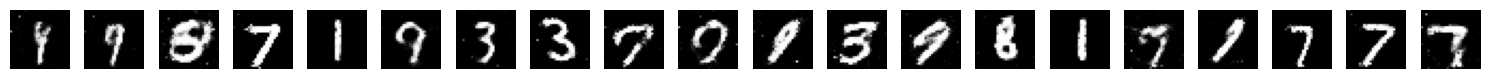

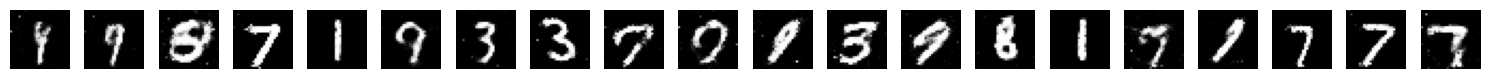

 80%|████████  | 321/400 [44:31<10:59,  8.35s/it]

Epoch [321/400], D Loss: 0.7723, G Loss: 1.9478


 80%|████████  | 322/400 [44:39<10:46,  8.28s/it]

Epoch [322/400], D Loss: 0.7828, G Loss: 1.9469


 81%|████████  | 323/400 [44:47<10:32,  8.22s/it]

Epoch [323/400], D Loss: 0.7793, G Loss: 1.9723


 81%|████████  | 324/400 [44:56<10:31,  8.31s/it]

Epoch [324/400], D Loss: 0.7712, G Loss: 1.9903


 81%|████████▏ | 325/400 [45:04<10:17,  8.23s/it]

Epoch [325/400], D Loss: 0.7912, G Loss: 1.9958


 82%|████████▏ | 326/400 [45:12<10:03,  8.16s/it]

Epoch [326/400], D Loss: 0.7832, G Loss: 1.9097


 82%|████████▏ | 327/400 [45:20<09:53,  8.13s/it]

Epoch [327/400], D Loss: 0.7878, G Loss: 1.9344


 82%|████████▏ | 328/400 [45:29<09:53,  8.24s/it]

Epoch [328/400], D Loss: 0.7827, G Loss: 1.9778


 82%|████████▏ | 329/400 [45:37<09:39,  8.17s/it]

Epoch [329/400], D Loss: 0.7641, G Loss: 1.9426
Epoch [330/400], D Loss: 0.7792, G Loss: 1.9673


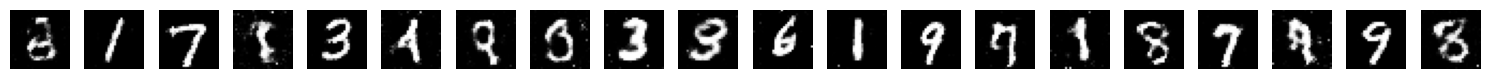

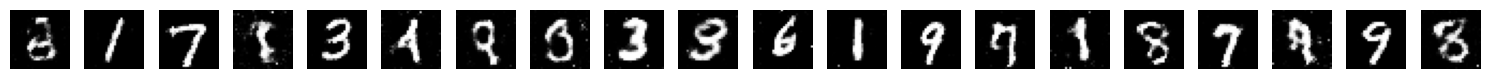

 83%|████████▎ | 331/400 [45:55<09:58,  8.68s/it]

Epoch [331/400], D Loss: 0.7823, G Loss: 1.9904


 83%|████████▎ | 332/400 [46:06<10:39,  9.40s/it]

Epoch [332/400], D Loss: 0.7702, G Loss: 1.9854


 83%|████████▎ | 333/400 [46:17<10:57,  9.82s/it]

Epoch [333/400], D Loss: 0.7816, G Loss: 1.9505


 84%|████████▎ | 334/400 [46:25<10:14,  9.31s/it]

Epoch [334/400], D Loss: 0.7715, G Loss: 1.9730


 84%|████████▍ | 335/400 [46:33<09:50,  9.09s/it]

Epoch [335/400], D Loss: 0.7869, G Loss: 1.9671


 84%|████████▍ | 336/400 [46:41<09:21,  8.78s/it]

Epoch [336/400], D Loss: 0.7834, G Loss: 1.9607


 84%|████████▍ | 337/400 [46:50<09:00,  8.59s/it]

Epoch [337/400], D Loss: 0.7891, G Loss: 2.0042


 84%|████████▍ | 338/400 [46:58<08:45,  8.47s/it]

Epoch [338/400], D Loss: 0.7853, G Loss: 1.9445


 85%|████████▍ | 339/400 [47:06<08:39,  8.51s/it]

Epoch [339/400], D Loss: 0.7748, G Loss: 1.9824
Epoch [340/400], D Loss: 0.7821, G Loss: 1.9791


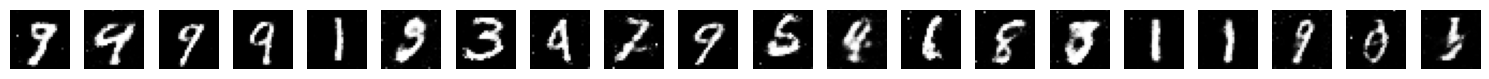

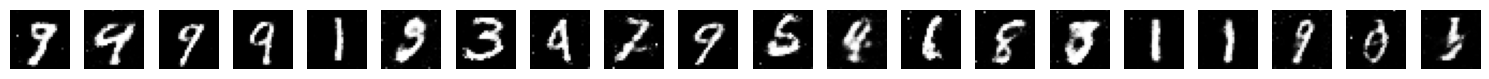

 85%|████████▌ | 341/400 [47:24<08:22,  8.51s/it]

Epoch [341/400], D Loss: 0.7683, G Loss: 1.9983


 86%|████████▌ | 342/400 [47:32<08:04,  8.36s/it]

Epoch [342/400], D Loss: 0.7762, G Loss: 1.9498


 86%|████████▌ | 343/400 [47:40<08:00,  8.43s/it]

Epoch [343/400], D Loss: 0.7848, G Loss: 1.9224


 86%|████████▌ | 344/400 [47:48<07:47,  8.34s/it]

Epoch [344/400], D Loss: 0.7832, G Loss: 1.9512


 86%|████████▋ | 345/400 [47:56<07:35,  8.28s/it]

Epoch [345/400], D Loss: 0.7752, G Loss: 1.9212


 86%|████████▋ | 346/400 [48:05<07:23,  8.22s/it]

Epoch [346/400], D Loss: 0.7664, G Loss: 1.9549


 87%|████████▋ | 347/400 [48:13<07:21,  8.33s/it]

Epoch [347/400], D Loss: 0.7919, G Loss: 1.9769


 87%|████████▋ | 348/400 [48:21<07:10,  8.27s/it]

Epoch [348/400], D Loss: 0.7908, G Loss: 1.9553


 87%|████████▋ | 349/400 [48:29<06:59,  8.22s/it]

Epoch [349/400], D Loss: 0.7718, G Loss: 1.9623
Epoch [350/400], D Loss: 0.8037, G Loss: 1.9199


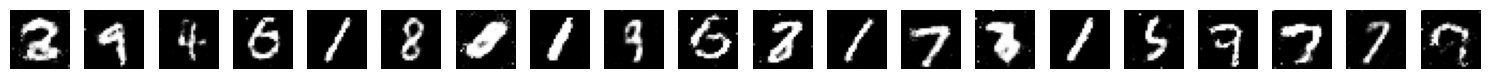

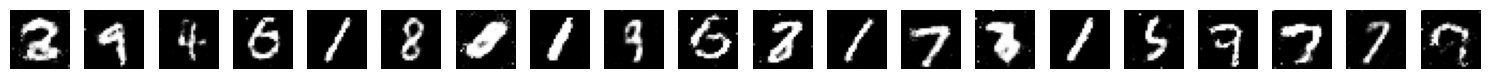

 88%|████████▊ | 351/400 [48:47<06:50,  8.38s/it]

Epoch [351/400], D Loss: 0.7643, G Loss: 2.0069


 88%|████████▊ | 352/400 [48:55<06:37,  8.29s/it]

Epoch [352/400], D Loss: 0.7908, G Loss: 1.9168


 88%|████████▊ | 353/400 [49:03<06:26,  8.22s/it]

Epoch [353/400], D Loss: 0.7774, G Loss: 1.9539


 88%|████████▊ | 354/400 [49:11<06:19,  8.26s/it]

Epoch [354/400], D Loss: 0.7994, G Loss: 1.9275


 89%|████████▉ | 355/400 [49:19<06:09,  8.22s/it]

Epoch [355/400], D Loss: 0.7840, G Loss: 1.9818


 89%|████████▉ | 356/400 [49:27<06:00,  8.19s/it]

Epoch [356/400], D Loss: 0.7814, G Loss: 1.9202


 89%|████████▉ | 357/400 [49:35<05:50,  8.15s/it]

Epoch [357/400], D Loss: 0.7863, G Loss: 1.9466


 90%|████████▉ | 358/400 [49:44<05:46,  8.26s/it]

Epoch [358/400], D Loss: 0.7810, G Loss: 1.9840


 90%|████████▉ | 359/400 [49:52<05:35,  8.18s/it]

Epoch [359/400], D Loss: 0.7704, G Loss: 1.9852
Epoch [360/400], D Loss: 0.7779, G Loss: 2.0091


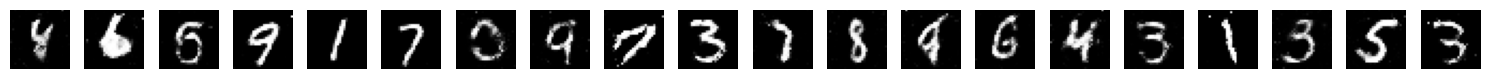

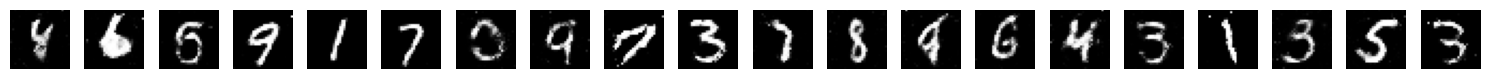

 90%|█████████ | 361/400 [50:09<05:27,  8.41s/it]

Epoch [361/400], D Loss: 0.7956, G Loss: 1.9459


 90%|█████████ | 362/400 [50:18<05:22,  8.48s/it]

Epoch [362/400], D Loss: 0.7774, G Loss: 1.9508


 91%|█████████ | 363/400 [50:26<05:09,  8.35s/it]

Epoch [363/400], D Loss: 0.7750, G Loss: 1.9881


 91%|█████████ | 364/400 [50:34<04:58,  8.29s/it]

Epoch [364/400], D Loss: 0.7738, G Loss: 1.9736


 91%|█████████▏| 365/400 [50:42<04:47,  8.21s/it]

Epoch [365/400], D Loss: 0.8025, G Loss: 1.9426


 92%|█████████▏| 366/400 [50:51<04:44,  8.36s/it]

Epoch [366/400], D Loss: 0.7935, G Loss: 1.9538


 92%|█████████▏| 367/400 [50:59<04:33,  8.28s/it]

Epoch [367/400], D Loss: 0.7766, G Loss: 1.9442


 92%|█████████▏| 368/400 [51:07<04:23,  8.24s/it]

Epoch [368/400], D Loss: 0.7844, G Loss: 1.9582


 92%|█████████▏| 369/400 [51:15<04:14,  8.20s/it]

Epoch [369/400], D Loss: 0.7766, G Loss: 1.9336
Epoch [370/400], D Loss: 0.7850, G Loss: 1.9487


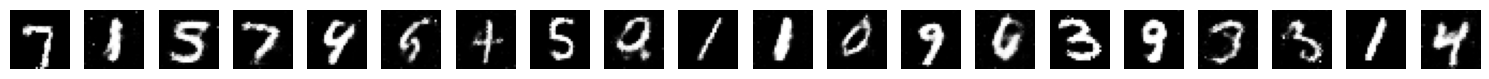

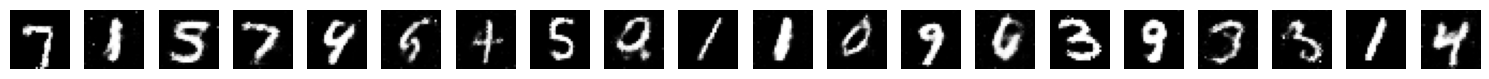

 93%|█████████▎| 371/400 [51:33<04:04,  8.43s/it]

Epoch [371/400], D Loss: 0.7864, G Loss: 1.9764


 93%|█████████▎| 372/400 [51:41<03:53,  8.33s/it]

Epoch [372/400], D Loss: 0.7745, G Loss: 1.9585


 93%|█████████▎| 373/400 [51:49<03:43,  8.27s/it]

Epoch [373/400], D Loss: 0.7842, G Loss: 1.9327


 94%|█████████▎| 374/400 [51:58<03:38,  8.42s/it]

Epoch [374/400], D Loss: 0.8040, G Loss: 1.9657


 94%|█████████▍| 375/400 [52:06<03:27,  8.31s/it]

Epoch [375/400], D Loss: 0.7678, G Loss: 1.9644


 94%|█████████▍| 376/400 [52:14<03:17,  8.25s/it]

Epoch [376/400], D Loss: 0.7890, G Loss: 1.9148


 94%|█████████▍| 377/400 [52:22<03:08,  8.19s/it]

Epoch [377/400], D Loss: 0.7857, G Loss: 1.8955


 94%|█████████▍| 378/400 [52:31<03:02,  8.29s/it]

Epoch [378/400], D Loss: 0.7896, G Loss: 1.9579


 95%|█████████▍| 379/400 [52:39<02:52,  8.22s/it]

Epoch [379/400], D Loss: 0.7837, G Loss: 1.9548
Epoch [380/400], D Loss: 0.7901, G Loss: 1.8821


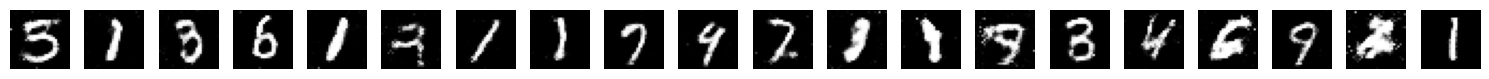

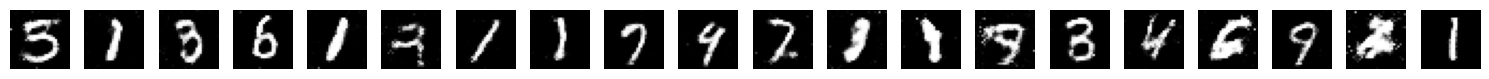

 95%|█████████▌| 381/400 [52:56<02:39,  8.41s/it]

Epoch [381/400], D Loss: 0.8054, G Loss: 1.9429


 96%|█████████▌| 382/400 [53:04<02:29,  8.31s/it]

Epoch [382/400], D Loss: 0.7863, G Loss: 1.9188


 96%|█████████▌| 383/400 [53:12<02:19,  8.20s/it]

Epoch [383/400], D Loss: 0.7861, G Loss: 1.9492


 96%|█████████▌| 384/400 [53:20<02:10,  8.14s/it]

Epoch [384/400], D Loss: 0.7804, G Loss: 2.0032


 96%|█████████▋| 385/400 [53:28<02:03,  8.20s/it]

Epoch [385/400], D Loss: 0.7857, G Loss: 1.9002


 96%|█████████▋| 386/400 [53:36<01:54,  8.15s/it]

Epoch [386/400], D Loss: 0.7947, G Loss: 1.9157


 97%|█████████▋| 387/400 [53:45<01:45,  8.15s/it]

Epoch [387/400], D Loss: 0.7869, G Loss: 1.8939


 97%|█████████▋| 388/400 [53:53<01:37,  8.14s/it]

Epoch [388/400], D Loss: 0.8046, G Loss: 1.8905


 97%|█████████▋| 389/400 [54:01<01:30,  8.25s/it]

Epoch [389/400], D Loss: 0.7787, G Loss: 1.9473
Epoch [390/400], D Loss: 0.7860, G Loss: 2.0109


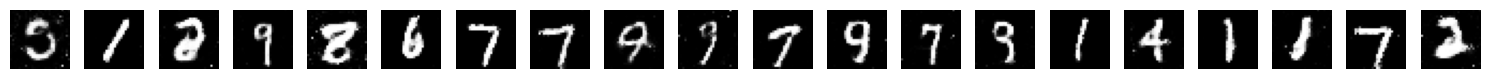

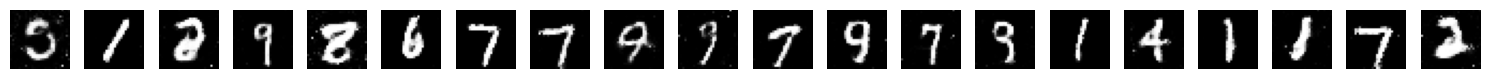

 98%|█████████▊| 391/400 [54:21<01:22,  9.13s/it]

Epoch [391/400], D Loss: 0.7978, G Loss: 1.9985


 98%|█████████▊| 392/400 [54:32<01:17,  9.72s/it]

Epoch [392/400], D Loss: 0.7656, G Loss: 1.9967


 98%|█████████▊| 393/400 [54:40<01:04,  9.27s/it]

Epoch [393/400], D Loss: 0.7976, G Loss: 1.9260


 98%|█████████▊| 394/400 [54:48<00:53,  8.94s/it]

Epoch [394/400], D Loss: 0.8044, G Loss: 1.9217


 99%|█████████▉| 395/400 [54:57<00:43,  8.72s/it]

Epoch [395/400], D Loss: 0.7844, G Loss: 1.8872


 99%|█████████▉| 396/400 [55:05<00:34,  8.70s/it]

Epoch [396/400], D Loss: 0.7920, G Loss: 1.9088


 99%|█████████▉| 397/400 [55:13<00:25,  8.51s/it]

Epoch [397/400], D Loss: 0.7925, G Loss: 1.9334


100%|█████████▉| 398/400 [55:21<00:16,  8.37s/it]

Epoch [398/400], D Loss: 0.7974, G Loss: 1.9284


100%|█████████▉| 399/400 [55:29<00:08,  8.31s/it]

Epoch [399/400], D Loss: 0.7665, G Loss: 1.9552
Epoch [400/400], D Loss: 0.7884, G Loss: 1.9534


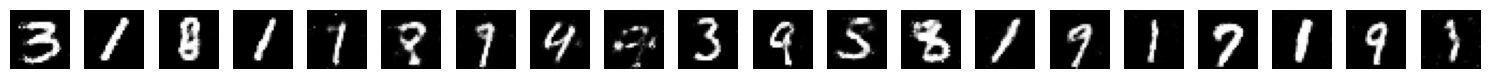

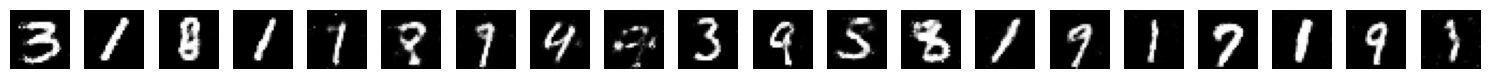

100%|██████████| 400/400 [55:39<00:00,  8.35s/it]


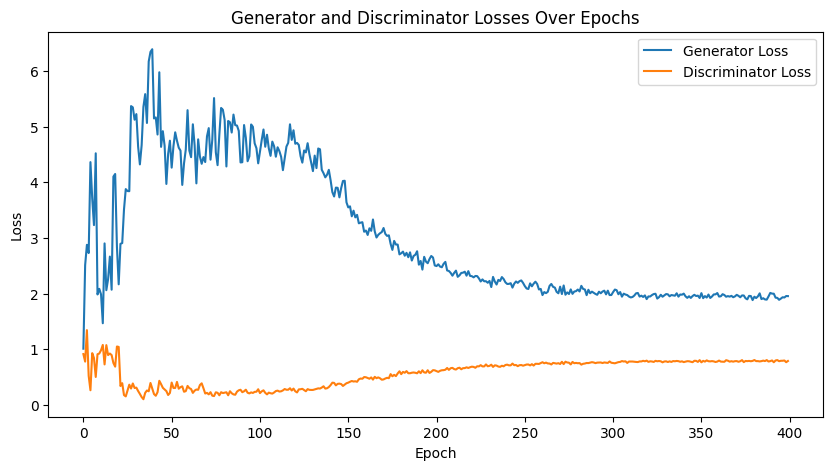

Training done


In [21]:
import torch
import os
from tqdm import trange
import argparse
from torchvision import datasets, transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

from model import Generator, Discriminator
from utils import D_train, G_train, save_models
from IPython.display import display 

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

parser = argparse.ArgumentParser(description='Train Normalizing Flow.')
parser.add_argument("--epochs", type=int, default=400, help="Number of epochs for training.")
parser.add_argument("--lr", type=float, default=0.0001, help="The learning rate to use for training.")
parser.add_argument("--batch_size", type=int, default=512, help="Size of mini-batches for SGD")
args = parser.parse_args(args=[])

os.makedirs('checkpoints', exist_ok=True)
os.makedirs('data', exist_ok=True)

print('Dataset loading...')
transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=(0.5,), std=(0.5,))])

train_dataset = datasets.MNIST(root='data/MNIST/', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='data/MNIST/', train=False, transform=transform, download=False)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=args.batch_size, shuffle=True, num_workers=16, pin_memory=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=args.batch_size, shuffle=False, num_workers=16, pin_memory=True)
print('Dataset Loaded.')

print('Model Loading...')
mnist_dim = 784
G = torch.nn.DataParallel(Generator(g_output_dim=mnist_dim)).to(device)
D = torch.nn.DataParallel(Discriminator(mnist_dim)).to(device)
print('Model loaded.')

criterion = nn.BCELoss().to(device)
G_optimizer = optim.Adam(G.parameters(), lr=args.lr)
D_optimizer = optim.Adam(D.parameters(), lr=args.lr)

print('Start Training:')

def plot_generated_images(generator, epoch, num_images=20):
    """Function to plot and display generated images from the generator."""
    generator.eval()
    with torch.no_grad():
        noise = torch.randn(num_images, 100).to(device)
        generated_images = generator(noise)
        generated_images = generated_images.view(-1, 1, 28, 28).cpu()

        # Create two rows of 10 images
        fig, axes = plt.subplots(2, 10, figsize=(15, 6))
        axes = axes.flatten()  # Flatten the axes array for easy iteration
        for ax, img in zip(axes, generated_images):
            ax.imshow(img.squeeze(), cmap='gray')
            ax.axis('off')
        plt.tight_layout()
        display(fig) 
        plt.show()

def plot_losses(G_losses, D_losses):
    """Function to plot the losses over epochs."""
    plt.figure(figsize=(10, 5))
    plt.plot(G_losses, label="Generator Loss")
    plt.plot(D_losses, label="Discriminator Loss")
    plt.title("Generator and Discriminator Losses Over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

# Initialize lists to store the losses
G_losses = []
D_losses = []

n_epoch = args.epochs
for epoch in trange(1, n_epoch + 1, leave=True):
    G_loss_epoch = 0
    D_loss_epoch = 0
    
    for batch_idx, (x, _) in enumerate(train_loader):
        x = x.view(-1, mnist_dim).to(device)
        
        D_loss, _, _ = D_train(x, G, D, D_optimizer, criterion)  # Capture only the first return value
        G_loss, _ = G_train(x, G, D, G_optimizer, criterion)  # Capture only the first return value

        # Accumulate the losses for the current epoch
        D_loss_epoch += D_loss
        G_loss_epoch += G_loss

    # Store the average loss per epoch
    D_losses.append(D_loss_epoch / len(train_loader))
    G_losses.append(G_loss_epoch / len(train_loader))

    print(f"Epoch [{epoch}/{n_epoch}], D Loss: {D_losses[-1]:.4f}, G Loss: {G_losses[-1]:.4f}")

    # Save models and generate images every 10 epochs
    if epoch % 10 == 0:
        save_models(G, D, 'checkpoints')
        plot_generated_images(G, epoch)

# After training, plot the losses
plot_losses(G_losses, D_losses)

print('Training done')

In [22]:
torch.save(G.state_dict(), 'generator2.pth')